<a href="https://colab.research.google.com/github/SHamidGh/TCI_WORKSHOP_PROJECT/blob/main/TCI_PROJECT_Hamid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lybraries

In [47]:
# Import necessary libraries
import pandas as pd
import requests
from google.colab import files
from google.colab import files
import pandas as pd
import requests
from datetime import datetime

# Uploading

In [48]:
# Upload the Excel file
uploaded = files.upload()

Saving Final_Tickets.xlsx to Final_Tickets.xlsx


In [49]:
# After uploading, you can read the Excel file into a DataFrame
df = pd.read_excel('Tickets.xlsx')

# Elevation

In [6]:
print(get_elevation(32.47141, 51.47536))

1636.0


In [7]:
def get_elevation(lat, lon):
    url = f"https://api.open-elevation.com/api/v1/lookup?locations={lat},{lon}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data['results'][0]['elevation']
    else:
        return None

def add_elevation_to_excel(input_file, output_file):
    # Read the Excel file
    df = pd.read_excel(input_file)

    # Check if 'codesite', 'lat', and 'long' columns exist
    if 'CODESITE' not in df.columns or 'lat' not in df.columns or 'long' not in df.columns:
        print("Error: 'CODESITE', 'lat', and 'long' columns must exist in the input file.")
        return

    # Create a dictionary to store latitude and longitude for each codesite
    codesite_coords = {}
    for index, row in df.iterrows():
        codesite = row['CODESITE']
        lat = row['lat']
        long = row['long']
        codesite_coords[codesite] = (lat, long)

    # Check if 'elevation' column exists, create if not
    if 'elevation' not in df.columns:
        df['elevation'] = None

    flag = 0
    # Fetch elevations and update the DataFrame
    for index, row in df.iterrows():

        codesite = row['CODESITE']
        if pd.isna(row['elevation']) :  # Check if elevation is empty
            print('index= ',index)
            print('flag= ',flag)
            flag = flag + 1
            lat = df.loc[index, 'lat']
            longg = df.loc[index, 'long']
            elevation = get_elevation(lat, longg)
            print(df.loc[index, 'elevation'])
            df.at[index, 'elevation'] = elevation
            print(df.loc[index, 'elevation'])
            print(elevation)

        if flag == 2000 :
          break

    # Save the updated DataFrame to a new Excel file
    df.to_excel(output_file, index=False)
    print(f"Updated file saved as {output_file}")


In [ ]:
print(df.loc[4, 'elevation'])

917.0


In [ ]:
print(get_elevation(33.3632, 51.55581))

2270.0


In [8]:
# Usage
input_file = 'Tickets.xlsx'  # Replace with your input Excel file name
output_file = 'updated_Tickets.xlsx'  # Replace with desired output file name
add_elevation_to_excel(input_file, output_file)

index=  1498
flag=  0
nan
1602.0
1602.0
index=  1499
flag=  1
nan
1595.0
1595.0
index=  1500
flag=  2
nan
1569.0
1569.0
index=  1523
flag=  3
nan
1593.0
1593.0
index=  1524
flag=  4
nan
1592.0
1592.0
index=  1525
flag=  5
nan
1592.0
1592.0
index=  1526
flag=  6
nan
1592.0
1592.0
index=  1527
flag=  7
nan
1592.0
1592.0
index=  1528
flag=  8
nan
1592.0
1592.0
index=  1529
flag=  9
nan
1592.0
1592.0
index=  1530
flag=  10
nan
1592.0
1592.0
index=  1531
flag=  11
nan
1583.0
1583.0
index=  1532
flag=  12
nan
1583.0
1583.0
index=  1533
flag=  13
nan
1583.0
1583.0
index=  1534
flag=  14
nan
1583.0
1583.0
index=  1535
flag=  15
nan
1583.0
1583.0
index=  1536
flag=  16
nan
1583.0
1583.0
index=  1537
flag=  17
nan
1583.0
1583.0
index=  2369
flag=  18
nan
1619.0
1619.0
index=  2370
flag=  19
nan
1619.0
1619.0
index=  2371
flag=  20
nan
1619.0
1619.0
index=  2372
flag=  21
nan
1619.0
1619.0
index=  2373
flag=  22
nan
1619.0
1619.0
index=  2374
flag=  23
nan
1568.0
1568.0
index=  2375
flag=  24
nan

# time quantization

In [18]:
def quantize_to_parts(dt, N):
    """Quantize the given datetime object to the nearest N parts of a 24-hour day."""
    total_minutes = dt.hour * 60 + dt.minute + dt.second / 60
    # Calculate the length of each part in minutes
    part_length = 1440 / N  # 1440 minutes in a day
    quantized_index = round(total_minutes / part_length) % N
    quantized_minutes = quantized_index * part_length
    quantized_hour = int(quantized_minutes // 60)
    quantized_minute = int(quantized_minutes % 60)
    return quantized_index

In [17]:
def process_excel_file(file_path, N):
    """Read an Excel file, quantize 'CREATETIME', and add 'Quantized Index' and 'Quantized Time' columns."""
    # Read the Excel file
    df = pd.read_excel(file_path)

    # Check if 'CREATETIME' column exists
    if 'CREATETIME' not in df.columns:
        raise ValueError("The 'CREATETIME' column is not present in the Excel file.")

    # Convert 'CREATETIME' to datetime objects and quantize
    df['Quantized Time Index'] = df['CREATETIME'].apply(
        lambda x: quantize_to_parts(pd.to_datetime(x), N)
    ).tolist()

    # Save the updated DataFrame back to Excel
    output_file_path = file_path.replace('.xlsx', f'_quantized_{N}.xlsx')
    df.to_excel(output_file_path, index=False)

    print(f"Quantized times added. Updated file saved as: {output_file_path}")

In [19]:
N = 24 * 4
process_excel_file('Tickets.xlsx', N)

Quantized times added. Updated file saved as: Tickets_quantized_96.xlsx


# DT training

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [60]:
# Load your dataset
file_path = 'Tickets.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

## Points

In [65]:
# Specify the target variable
target_column = 'Points'  # Replace with the name of your target column

# Select specific columns for features (X)
# Replace 'Column1', 'Column2', ... with the actual names of the columns you want
X = data[['CODESITE_encoded', 'lat', 'long', 'elevation', 'Quantized Time Index', 'MTBRTC_USER_encoded', 'Alarm_Type_encoded', 'FAULTLEVEL_encoded', 'Affected_encoded', 'PRODUCT_TYPE_encoded', 'orginator group_encoded', 'OPERATORNAMEPROVINCE_encoded', 'SUBCAUSE_encoded', 'ROOTCAUSE_encoded']]  # Specify the columns you want to include in X
y = data[target_column]  # Target variable

In [67]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [68]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

                         Feature  Importance
4           Quantized Time Index    0.225543
5            MTBRTC_USER_encoded    0.121117
12              SUBCAUSE_encoded    0.105054
8               Affected_encoded    0.097168
1                            lat    0.085400
2                           long    0.083185
3                      elevation    0.082543
11  OPERATORNAMEPROVINCE_encoded    0.075785
0               CODESITE_encoded    0.072471
13             ROOTCAUSE_encoded    0.027727
6             Alarm_Type_encoded    0.014924
7             FAULTLEVEL_encoded    0.006352
10       orginator group_encoded    0.002730
9           PRODUCT_TYPE_encoded    0.000000


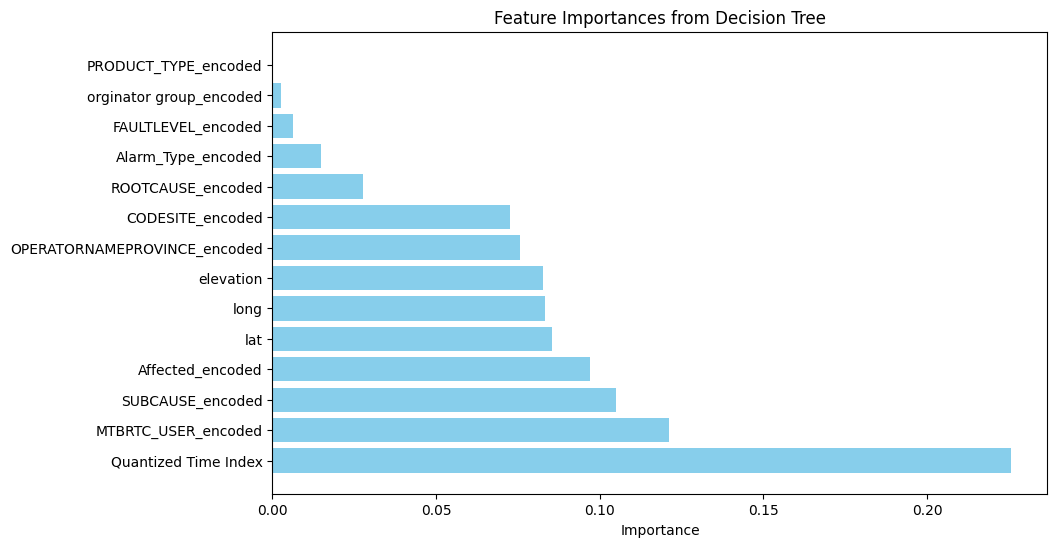

In [69]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.show()

## MTTR

In [70]:
# Specify the target variable
target_column = 'MTTR'  # Replace with the name of your target column

# Select specific columns for features (X)
# Replace 'Column1', 'Column2', ... with the actual names of the columns you want
X = data[['CODESITE_encoded', 'lat', 'long', 'elevation', 'Quantized Time Index', 'MTBRTC_USER_encoded', 'Alarm_Type_encoded', 'FAULTLEVEL_encoded', 'Affected_encoded', 'PRODUCT_TYPE_encoded', 'orginator group_encoded', 'OPERATORNAMEPROVINCE_encoded', 'SUBCAUSE_encoded', 'ROOTCAUSE_encoded']]  # Specify the columns you want to include in X
y = data[target_column].astype(int)  # Target variable

In [71]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [72]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

                         Feature  Importance
4           Quantized Time Index    0.145415
0               CODESITE_encoded    0.129847
2                           long    0.129039
1                            lat    0.126392
3                      elevation    0.124066
11  OPERATORNAMEPROVINCE_encoded    0.104931
5            MTBRTC_USER_encoded    0.099948
6             Alarm_Type_encoded    0.047914
12              SUBCAUSE_encoded    0.042444
8               Affected_encoded    0.024513
13             ROOTCAUSE_encoded    0.016665
7             FAULTLEVEL_encoded    0.006397
10       orginator group_encoded    0.002429
9           PRODUCT_TYPE_encoded    0.000000


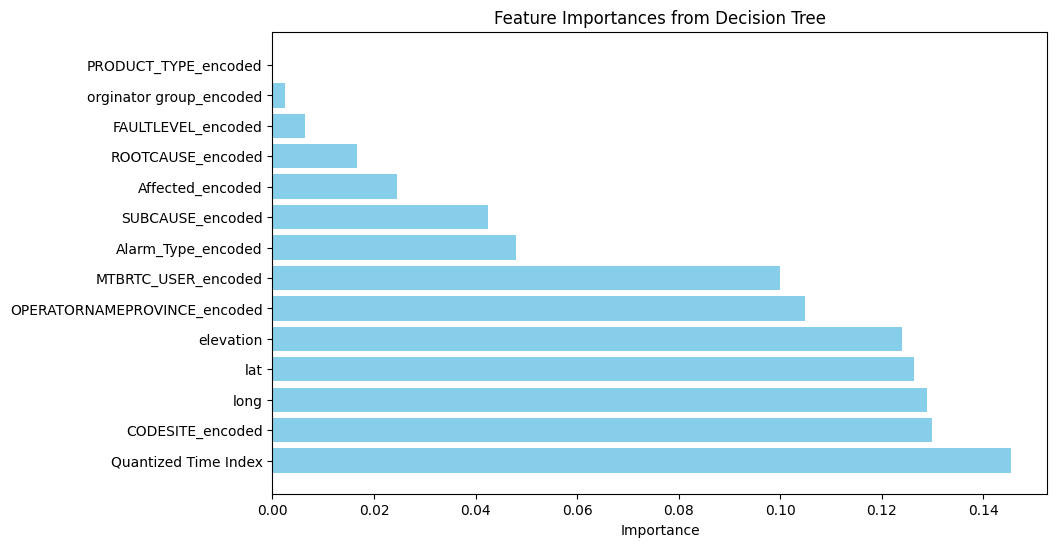

In [73]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.show()

## MTRBTC

In [75]:
# Specify the target variable
target_column = 'MTRBTC'  # Replace with the name of your target column

# Select specific columns for features (X)
# Replace 'Column1', 'Column2', ... with the actual names of the columns you want
X = data[['CODESITE_encoded', 'lat', 'long', 'elevation', 'Quantized Time Index', 'MTBRTC_USER_encoded', 'Alarm_Type_encoded', 'FAULTLEVEL_encoded', 'Affected_encoded', 'PRODUCT_TYPE_encoded', 'orginator group_encoded', 'OPERATORNAMEPROVINCE_encoded', 'SUBCAUSE_encoded', 'ROOTCAUSE_encoded']]  # Specify the columns you want to include in X
y = data[target_column].astype(int)  # Target variable


In [76]:

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [77]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

                         Feature  Importance
4           Quantized Time Index    0.149211
0               CODESITE_encoded    0.144725
1                            lat    0.126149
2                           long    0.122646
3                      elevation    0.115152
11  OPERATORNAMEPROVINCE_encoded    0.088188
12              SUBCAUSE_encoded    0.073866
5            MTBRTC_USER_encoded    0.065633
6             Alarm_Type_encoded    0.061111
8               Affected_encoded    0.026104
13             ROOTCAUSE_encoded    0.020638
7             FAULTLEVEL_encoded    0.004691
10       orginator group_encoded    0.001885
9           PRODUCT_TYPE_encoded    0.000000


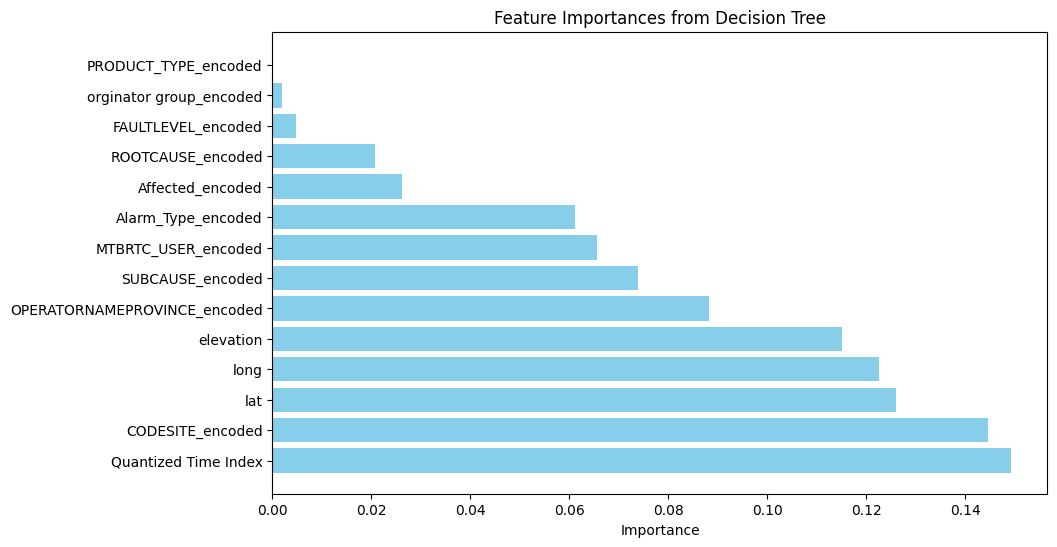

In [78]:

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.show()

## MTTA

In [79]:
# Specify the target variable
target_column = 'MTTA'  # Replace with the name of your target column

# Select specific columns for features (X)
# Replace 'Column1', 'Column2', ... with the actual names of the columns you want
X = data[['CODESITE_encoded', 'lat', 'long', 'elevation', 'Quantized Time Index', 'MTBRTC_USER_encoded', 'Alarm_Type_encoded', 'FAULTLEVEL_encoded', 'Affected_encoded', 'PRODUCT_TYPE_encoded', 'orginator group_encoded', 'OPERATORNAMEPROVINCE_encoded', 'SUBCAUSE_encoded', 'ROOTCAUSE_encoded']]  # Specify the columns you want to include in X
y = data[target_column].astype(int)  # Target variable

In [80]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [81]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

                         Feature  Importance
4           Quantized Time Index    0.152946
0               CODESITE_encoded    0.151461
2                           long    0.138645
1                            lat    0.133576
3                      elevation    0.103213
5            MTBRTC_USER_encoded    0.090534
6             Alarm_Type_encoded    0.062289
11  OPERATORNAMEPROVINCE_encoded    0.061653
12              SUBCAUSE_encoded    0.058250
8               Affected_encoded    0.022395
13             ROOTCAUSE_encoded    0.020926
7             FAULTLEVEL_encoded    0.002903
10       orginator group_encoded    0.000809
9           PRODUCT_TYPE_encoded    0.000398


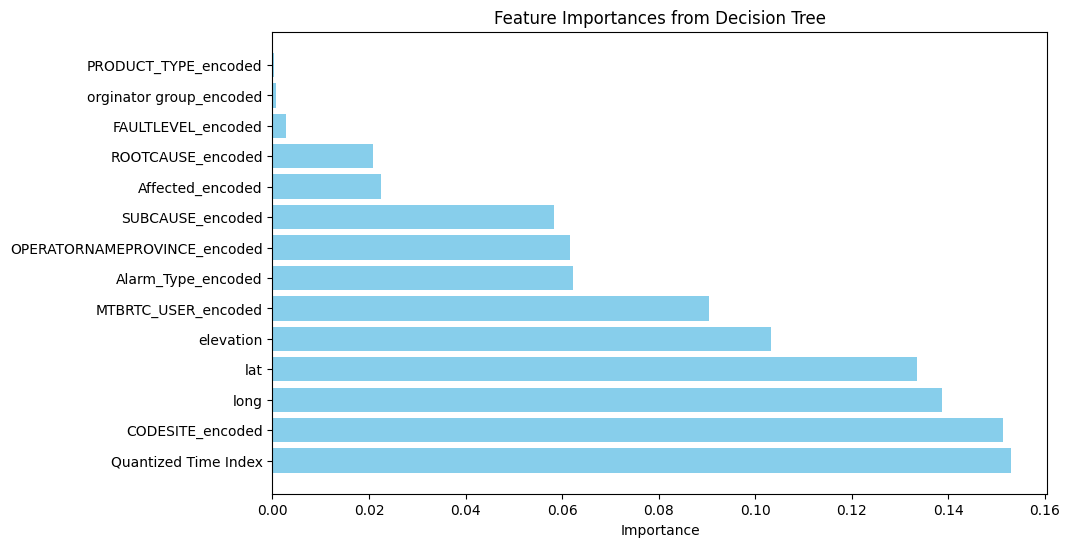

In [82]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.show()
